Widya Anastasya | DAC121

## Data Preparation

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [ ]:
path_dataset = '/content/Data_Project.csv'

In [ ]:
data1 = pd.read_csv('Data_Project.csv')
data1.head()

,student_id,hours_studied,previous_score,extracurricular_activities,sleep_hours,sample_question,performance_index
0,3427127,1.0,49.0,Yes,7.0,3.0,24.0
1,3425166,7.0,75.0,No,6.0,6.0,67.0
2,3428492,5.0,NaN,Yes,5.0,2.0,41.0
3,3425393,7.0,93.0,No,9.0,3.0,84.0
4,3426412,4.0,46.0,Yes,9.0,3.0,28.0


In [ ]:
column_names = data1.columns.tolist()
print(column_names)

['student_id', 'hours_studied', 'previous_score', 'extracurricular_activities', 'sleep_hours', 'sample_question', 'performance_index']


In [ ]:
#Knowing your data
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10007 entries, 0 to 10006
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   student_id                  10007 non-null  int64  
 1   hours_studied               9958 non-null   float64
 2   previous_score              9883 non-null   float64
 3   extracurricular_activities  9958 non-null   object 
 4   sleep_hours                 9958 non-null   float64
 5   sample_question             9958 non-null   float64
 6   performance_index           9958 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 547.4+ KB


In [ ]:
#Checking for missing values
missing = data1.isna().sum()
print(missing)

student_id                      0
hours_studied                  49
previous_score                124
extracurricular_activities     49
sleep_hours                    49
sample_question                49
performance_index              49
dtype: int64


In [ ]:
#Checking percentage for missing values
missing = missing.to_frame(name='num_missing')
missing['perc_missing'] = (missing['num_missing']/data1.shape[0])*100
for index, row in missing.iterrows():
    if (row['num_missing'] > 0):
        print ("For \"%s\" the number of missing values are: %d (%.0f%%)" %  (index,
                                                                     row['num_missing'],
                                                                    row['perc_missing']))

For "hours_studied" the number of missing values are: 49 (0%)
For "previous_score" the number of missing values are: 124 (1%)
For "extracurricular_activities" the number of missing values are: 49 (0%)
For "sleep_hours" the number of missing values are: 49 (0%)
For "sample_question" the number of missing values are: 49 (0%)
For "performance_index" the number of missing values are: 49 (0%)


In [ ]:
#Checking for duplicated data
data1.duplicated().sum()
#No duplicated data

0

In [ ]:
#Missing values are ≤ 1%, safe to drop
#Dropping missing values
data2 = data1.dropna()
data2.isna().sum()

student_id                    0
hours_studied                 0
previous_score                0
extracurricular_activities    0
sleep_hours                   0
sample_question               0
performance_index             0
dtype: int64

In [ ]:
#Outlier Identification
#dd = datadrop, dropping non number columns for outlier testing
dd = data1.drop(['student_id', 'extracurricular_activities'], axis=1)
def outlier_identification(dd):
  for col in dd.columns:
    # calculate the interquartile range
    q1 = np.percentile(dd[col], 25)
    q3 = np.percentile(dd[col], 75)
    iqr = q3 - q1

    # define the lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # identify outliers
    outliers = dd[col][(dd[col] < lower_bound) | (dd[col] > upper_bound)]

    print('Outliers for column {}: {}'.format(col, outliers))

outlier_identification(dd)

Outliers for column hours_studied: Series([], Name: hours_studied, dtype: float64)
Outliers for column previous_score: Series([], Name: previous_score, dtype: float64)
Outliers for column sleep_hours: Series([], Name: sleep_hours, dtype: float64)
Outliers for column sample_question: Series([], Name: sample_question, dtype: float64)
Outliers for column performance_index: Series([], Name: performance_index, dtype: float64)


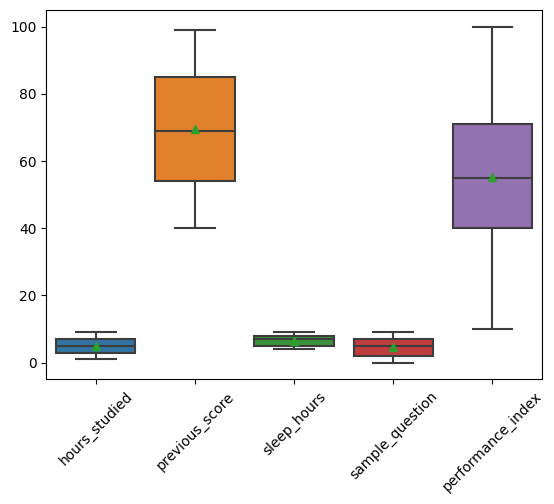

In [ ]:
#Detecting no outliers
#Proof
#Create boxplots
sns.boxplot(
    showmeans=True,
    data=dd
)

#Rotate x labels to prevent overlapping
plt.xticks(rotation=45)
plt.show()

## Exploratory Data Analysis

In [ ]:
data2.describe()

,student_id,hours_studied,previous_score,sleep_hours,sample_question,performance_index
count,9.883000e+03,9883.000000,9883.000000,9883.000000,9883.000000,9883.000000
mean,3.425007e+06,4.991298,69.430942,6.529394,4.584337,55.205808
std,2.885087e+03,2.587964,17.350225,1.697117,2.866320,19.221147
min,3.420001e+06,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.422514e+06,3.000000,54.000000,5.000000,2.000000,40.000000
50%,3.425012e+06,5.000000,69.000000,7.000000,5.000000,55.000000
75%,3.427506e+06,7.000000,85.000000,8.000000,7.000000,70.500000
max,3.430000e+06,9.000000,99.000000,9.000000,9.000000,100.000000


<ipython-input-27-3f3d0ed8a1bb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data2.corr(), cmap='YlGnBu',annot = True)


<Axes: >

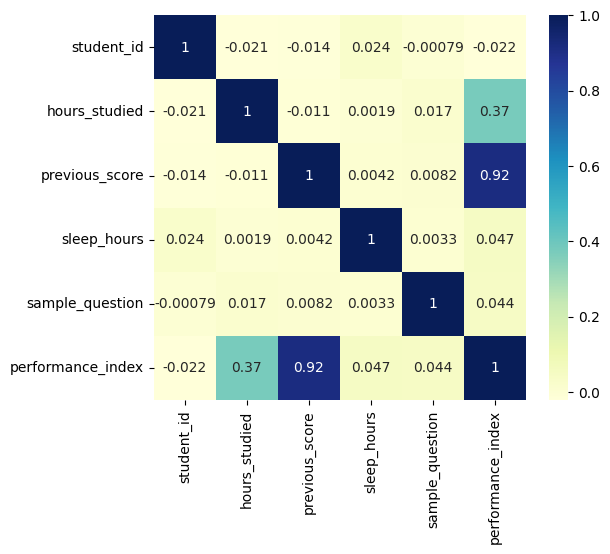

In [ ]:
#Heatmap to see correlation between columns
plt.figure(figsize = (6,5))
sns.heatmap(data2.corr(), cmap='YlGnBu',annot = True)

The highest correlation is between previous score and performance index at 0.92, followed by hours_studied and performance_index at 0.37.

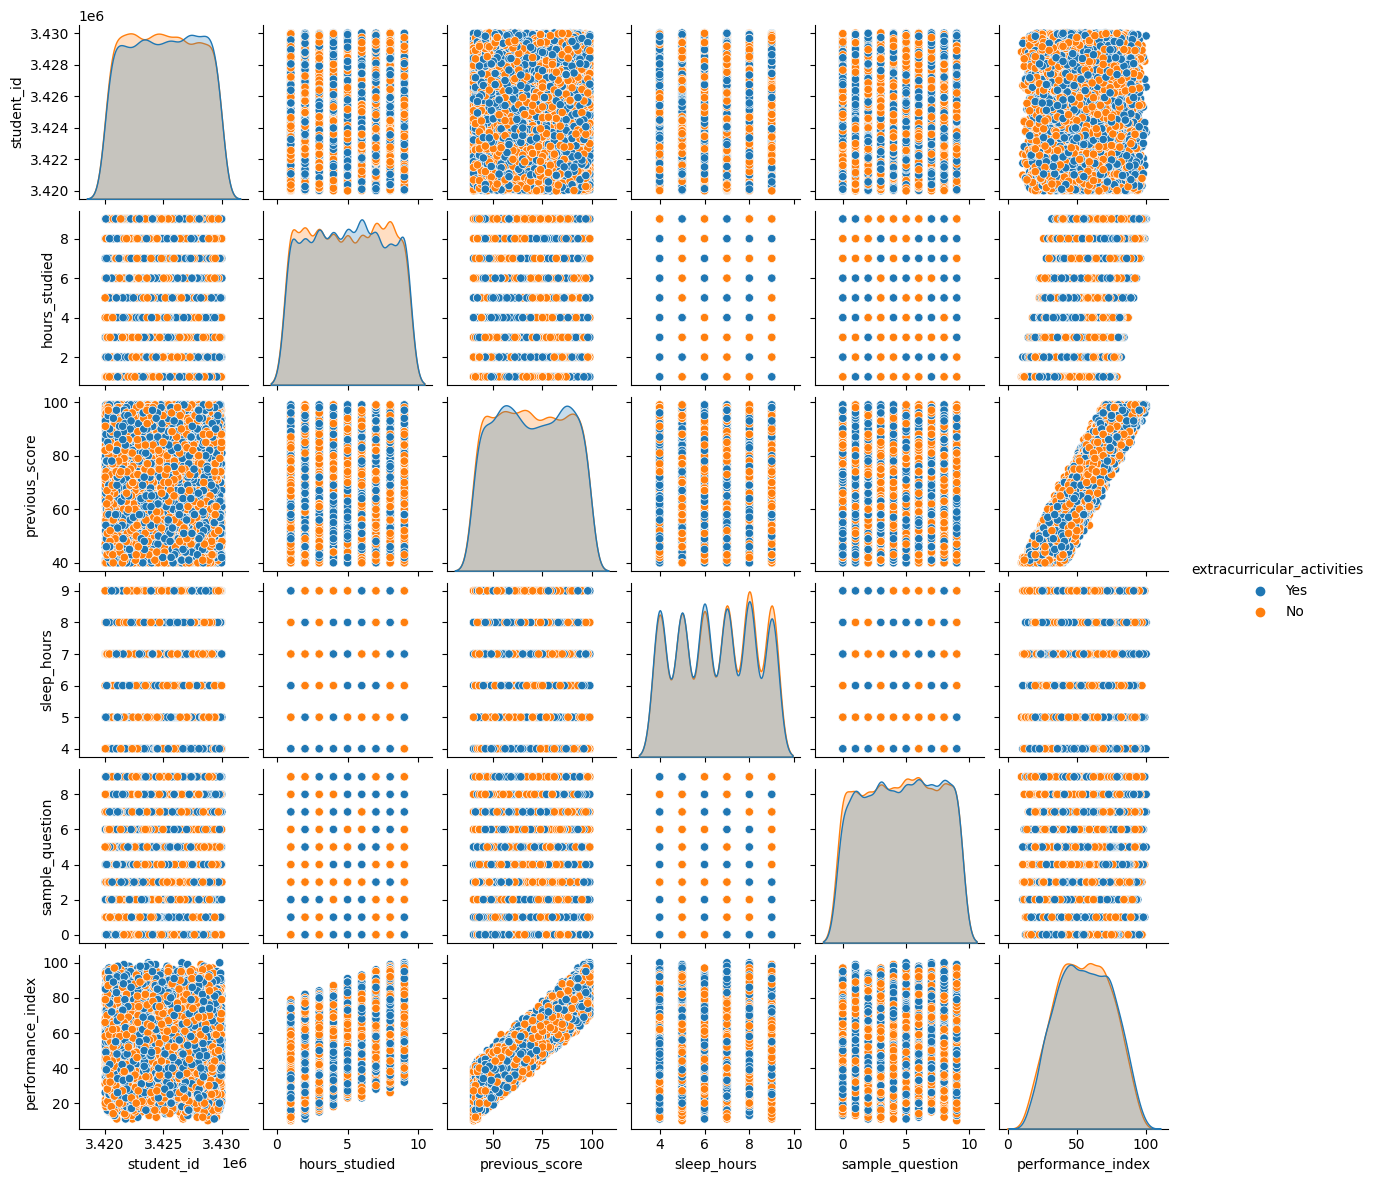

In [ ]:
sns.pairplot(data2, hue='extracurricular_activities', height=2)

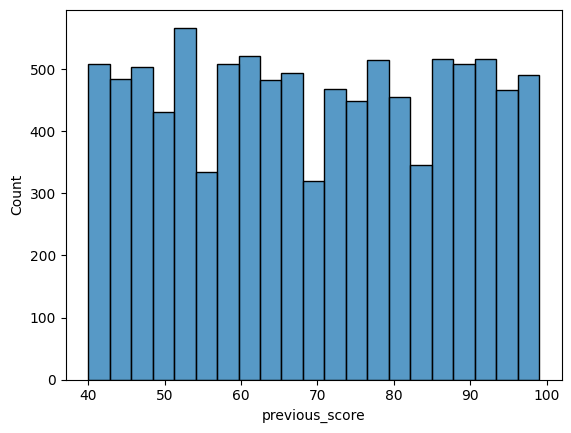

In [ ]:
sns.histplot(x='previous_score', data=data2, )
plt.show()

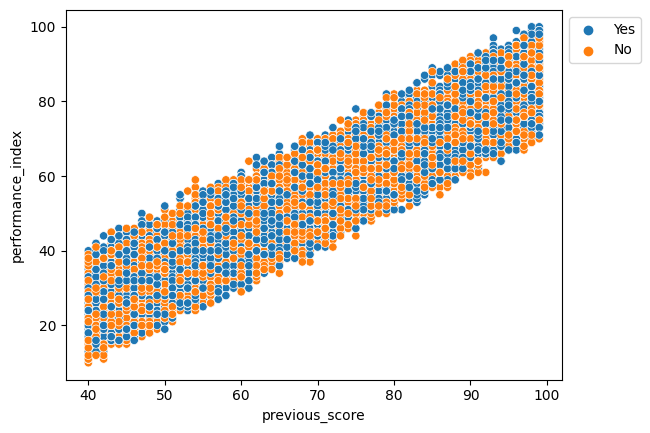

In [ ]:
sns.scatterplot(x='previous_score', y='performance_index', data=data2, hue='extracurricular_activities')
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

<Axes: xlabel='hours_studied', ylabel='performance_index'>

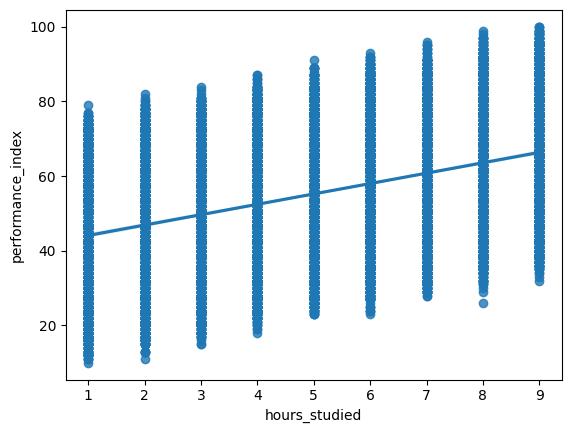

In [ ]:
sns.regplot(data=data2, x='hours_studied', y='performance_index')

## Model Regression

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X1 = data2[['previous_score', 'hours_studied']]
#Variance inflation factor (VIF)
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

vif_scores = calculate_vif(X1)
print(vif_scores)

         Variable       VIF
0  previous_score  3.840611
1   hours_studied  3.840611


Variance inflation factor (VIF) is a measure of how much the variance of an estimated regression coefficient is inflated due to multicollinearity. Multicollinearity is a condition where two or more independent variables in a multiple regression model are highly correlated. A VIF of 1 indicates that there is no multicollinearity, while a VIF greater than 10 indicates that there is severe multicollinearity. A VIF of 5 or greater is often considered to be a cause for concern.

In [ ]:
X = data2[['previous_score','hours_studied']]
y = data2['performance_index']
#Adding constant to X so that the line fitting will not pas origin (0,0), improving accuracy
X1 = sm.add_constant(X)
X1.head()

,const,previous_score,hours_studied
0,1.0,49.0,1.0
1,1.0,75.0,7.0
3,1.0,93.0,7.0
4,1.0,46.0,4.0
5,1.0,46.0,8.0


In [ ]:
#Linear regression model
model = sm.OLS(y,X1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      performance_index   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 3.444e+05
Date:                Mon, 28 Aug 2023   Prob (F-statistic):               0.00
Time:                        03:26:13   Log-Likelihood:                -22193.
No. Observations:                9883   AIC:                         4.439e+04
Df Residuals:                    9880   BIC:                         4.441e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -29.8016      0.105   -283.

R-squared of 0.986 indicates that the "previous_score" variable has a 98.6% effect on the "performance_index" variable. While the p-value in the column "P>|t|" which is less than 0.05 indicates that the variable is significant.

In [ ]:
#coefficient estimates for variable 'const' (a)
a=model.params['const']
print(a)

-29.801558908907754


In [ ]:
#coefficient estimates for variable 'previous_score' (b)
b=model.params['previous_score']
print(b)

1.018921943243255


In [ ]:
#coefficient estimates for variable 'hours_studied' (c)
c=model.params['hours_studied']
print(c)

2.8575043919483467


In [ ]:
#function for linear regression
print(f'y={a}+{b}x1+{c}x2')

y=-29.801558908907754+1.018921943243255x1+2.8575043919483467x2


In [ ]:
#R-squared of 0.985 indicates that the the independent variable (previous_score & hour_studied)
#has a 98.6% effect on the dependent variable (performance_index).
model.rsquared

0.9858591713222217

In [ ]:
#Homoscedasticity Assumption Test (Using the Breusch-Pagan test)
residual=model.resid
homoskedastisitas_test = sms.het_breuschpagan(residual, X1)
print(f'Homoskedastisitas Test: {homoskedastisitas_test}')

Homoskedastisitas Test: (0.13924671522095777, 0.9327450650850118, 0.0696032040079609, 0.9327643208193304)


The output of the het_breuschpagan() function are:
1. The chi-squared statistic : 0.139, small chi-squared stat
2. The p-value for the chi-squared statistic : 0.932, A high p-value indicates that the null hypothesis cannot be rejected, which means that there is no evidence of heteroscedasticity (good, meaning variance of the residuals is constant across all values of the independent variable)
3. The degrees of freedom : 2 The Jarque-Bera statistic : 0.069 means that the residuals are normally distributed.
Overall, the results of the het_breuschpagan() function suggest that there is no evidence of heteroscedasticity or non-normality in the model.

In [ ]:
#Test the assumption of independence
durbin_watson_statistic = sms.durbin_watson(residual)
print(f'Durbin-Watson Statistic: {durbin_watson_statistic}')

Durbin-Watson Statistic: 1.9942273670502701


The Durbin-Watson statistic is a test statistic that is used to test the null hypothesis of independence of the residuals.
the Durbin-Watson statistic is 1.994. This is close to 2, so we cannot reject the null hypothesis of independence.
This means that there is no evidence of autocorrelation in the model.

In [ ]:
#Residual normality assumption test
from scipy import stats
#Calculate test statistics and p-values
kstest_statistic, kstest_pvalue = stats.kstest(residual, 'norm')

print(f"Kolmogorov-Smirnov Statistic: {kstest_statistic}")
print(f"P-Value: {kstest_pvalue}")

Kolmogorov-Smirnov Statistic: 0.1902230568566019
P-Value: 1.21697004275e-313


The Kolmogorov-Smirnov statistic is 0.190. This is a relatively high Kolmogorov-Smirnov statistic,
so we can reject the null hypothesis of normality. This means that the residuals are not normally distributed.
The p-value is 1.216e-313. This is a very small p-value, so we can also reject the null hypothesis of normality.
This means that the residuals are not normally distributed.

In [ ]:
#y_actual (actual value of performance index in dataset)
data2['performance_index'].head()

0    24.0
1    67.0
3    84.0
4    28.0
5    44.0
Name: performance_index, dtype: float64

In [ ]:
#y_pred (prediction of performance index based on model)
y_pred = model.predict(X1)
y_pred.head()

0    22.983121
1    66.620118
3    84.960713
4    28.498868
5    39.928886
dtype: float64

In [ ]:
#integration into dataframe
data2_result = pd.DataFrame({
    'y_actual': data2['performance_index'],
    'y_pred': y_pred
})

data2_result.head()

,y_actual,y_pred
0,24.0,22.983121
1,67.0,66.620118
3,84.0,84.960713
4,28.0,28.498868
5,44.0,39.928886


In [ ]:
# Error (Residual)
error = data2_result['y_actual'] - data2_result['y_pred']

data2_result['error'] = error
data2_result.head()

,y_actual,y_pred,error
0,24.0,22.983121,1.016879
1,67.0,66.620118,0.379882
3,84.0,84.960713,-0.960713
4,28.0,28.498868,-0.498868
5,44.0,39.928886,4.071114


In [ ]:
# Squared Error
data2_result['squared_error'] = data2_result['error'] ** 2
data2_result.head()

,y_actual,y_pred,error,squared_error
0,24.0,22.983121,1.016879,1.034044
1,67.0,66.620118,0.379882,0.144311
3,84.0,84.960713,-0.960713,0.922969
4,28.0,28.498868,-0.498868,0.248869
5,44.0,39.928886,4.071114,16.573972


In [ ]:
# MSE (Mean Squared Error)

MSE = data2_result['squared_error'].mean()
MSE

5.223835573298513

In [ ]:
# RMSE (Root Mean Squared Error)

RMSE = np.sqrt(MSE)
RMSE

2.285571170035734